# Data cleansing notes on removed records:

## See data_engineering.ipynb for more details.

### Measurement Records Information
    19,550 total records before changes
    1,447 records with blank precipitation (col = "prcp")
    18,103 records with no known issues after removing 1,447 with blank prcp
    Percentage of records removed is 0.07%
    Percentage of records remaining is 93.0%


In [1]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))
import datetime as dt
from datetime import datetime, date, time

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, and_

In [2]:
# Create an engine for the hawaii.sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Use the Inspector to explore the database
inspector = inspect(engine)
inspector.get_table_names()

['station', 'weather']

In [4]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('weather')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
# Reflect hawaii database table station into its ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

In [7]:
# Reflect hawaii database table weather into it's ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
weather = Base.classes.weather

In [8]:
# Start a session to query the database
session = Session(engine)

In [9]:
# Get a number for count(*) by using scalar()
session.query(func.count(station.id)).scalar()

9

In [10]:
# Get a number for count(*) by using scalar()
session.query(func.count(weather.id)).scalar()

18103

# Queries for One Station Precipitation Analysis

In [11]:
# Station - USC00519397 WAIKIKI 717.2, HI US
s519397 = session.query(weather.date, weather.prcp).\
 filter(and_(weather.date.between('2015-01-01','2015-12-31'), weather.station == 'USC00519397')).\
 order_by(weather.station, weather.date.asc()).all()
s519397

[('2015-01-01', 0.0),
 ('2015-01-02', 0.04),
 ('2015-01-03', 0.86),
 ('2015-01-04', 0.02),
 ('2015-01-05', 0.0),
 ('2015-01-06', 0.02),
 ('2015-01-07', 0.0),
 ('2015-01-08', 0.0),
 ('2015-01-09', 0.0),
 ('2015-01-10', 0.0),
 ('2015-01-11', 0.0),
 ('2015-01-12', 0.0),
 ('2015-01-13', 0.0),
 ('2015-01-14', 0.0),
 ('2015-01-15', 0.0),
 ('2015-01-16', 0.0),
 ('2015-01-17', 0.0),
 ('2015-01-18', 0.0),
 ('2015-01-19', 0.0),
 ('2015-01-20', 0.0),
 ('2015-01-21', 0.0),
 ('2015-01-22', 0.0),
 ('2015-01-23', 0.0),
 ('2015-01-24', 0.2),
 ('2015-01-25', 0.03),
 ('2015-01-26', 0.0),
 ('2015-01-27', 0.0),
 ('2015-01-28', 0.0),
 ('2015-01-29', 0.0),
 ('2015-01-30', 0.0),
 ('2015-01-31', 0.0),
 ('2015-02-01', 0.0),
 ('2015-02-02', 0.0),
 ('2015-02-03', 0.0),
 ('2015-02-04', 0.01),
 ('2015-02-05', 0.19),
 ('2015-02-06', 0.0),
 ('2015-02-07', 0.0),
 ('2015-02-08', 0.0),
 ('2015-02-09', 0.0),
 ('2015-02-10', 0.1),
 ('2015-02-11', 0.0),
 ('2015-02-12', 0.0),
 ('2015-02-13', 0.0),
 ('2015-02-14', 0.08),
 (

In [12]:
# put data into a data frame for charting
s519397_df = pd.DataFrame(s519397) 
print(len(s519397_df.index))
s519397_df.info()

360
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
date    360 non-null object
prcp    360 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [13]:
# Convert the string to a datetime object
s519397_df["date"] = pd.to_datetime(s519397_df["date"], format='%Y-%m-%d')
s519397_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
date    360 non-null datetime64[ns]
prcp    360 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [14]:
# Set the index to the date column for pandas df.plot()
s519397_df = s519397_df.set_index('date')
print(len(s519397_df.index))
s519397_df.info()
s519397_df.head(5)

360
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
prcp    360 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB


,prcp
date,
2015-01-01,0.00
2015-01-02,0.04
2015-01-03,0.86
2015-01-04,0.02
2015-01-05,0.00


In [15]:
# Summary Statistics for Station - USC00519397 WAIKIKI 717.2, HI US
s519397_df["prcp"].max()

1.5700000000000001

In [16]:
# Summary Statistics for Station - USC00519397 WAIKIKI 717.2, HI US
s519397_df["prcp"].min()

0.0

In [17]:
# Summary Statistics for Station - USC00519397 WAIKIKI 717.2, HI US
s519397_df["prcp"].mean()

0.05099999999999995

In [18]:
# Summary Statistics for Station - USC00519397 WAIKIKI 717.2, HI US
s519397_df["prcp"].sum()

18.35999999999998

In [19]:
# Summary Statistics for Station - USC00519397 WAIKIKI 717.2, HI US
s519397_df["prcp"].describe()

count    360.000000
mean       0.051000
std        0.155938
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        1.570000
Name: prcp, dtype: float64

<IPython.core.display.Javascript object>


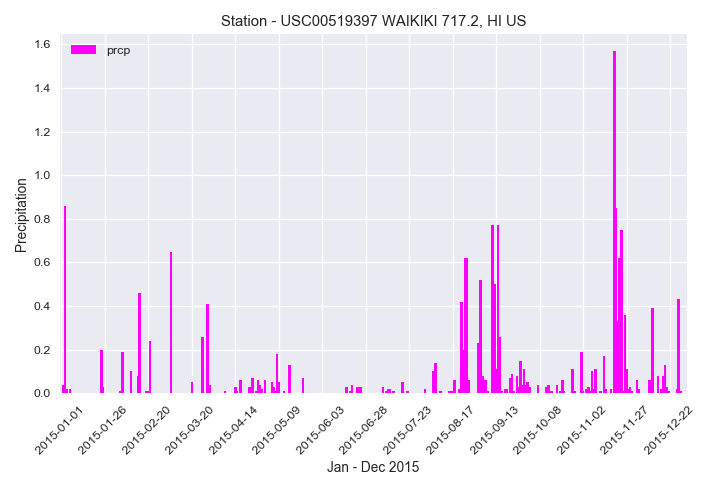

In [20]:
# Pandas DataFrame.plot(kind='bar')

ax = s519397_df.plot(kind='bar',color='magenta', width=1.5, 
                     title="Station - USC00519397 WAIKIKI 717.2, HI US")
ax.set_xlabel("Jan - Dec 2015")
ax.set_ylabel("Precipitation")

n = 25

xticks = ax.xaxis.get_ticklocs()
xticklabels = [l.get_text().replace("00:00:00","") for l in ax.xaxis.get_ticklabels()]
ax.set_xticks(xticks[::n])
ax.set_xticklabels(xticklabels[::n], rotation=45)

plt.tight_layout()
plt.savefig("Station-USC00519397_prcp_jan-dec-2015.png")
plt.show()

# Queries for All Stations Mean Precipitation Chart

In [21]:
station_mean = session.query(weather.date, func.avg(weather.prcp)).\
    filter(weather.date.between('2015-01-01','2015-12-31')).\
    group_by(weather.date).all()
station_mean

[('2015-01-01', 0.0016666666666666668),
 ('2015-01-02', 0.01),
 ('2015-01-03', 1.0542857142857145),
 ('2015-01-04', 0.025714285714285714),
 ('2015-01-05', 0.0),
 ('2015-01-06', 0.035),
 ('2015-01-07', 0.0),
 ('2015-01-08', 0.0),
 ('2015-01-09', 0.0),
 ('2015-01-10', 0.018),
 ('2015-01-11', 0.0),
 ('2015-01-12', 0.005714285714285714),
 ('2015-01-13', 0.0014285714285714286),
 ('2015-01-14', 0.0),
 ('2015-01-15', 0.0),
 ('2015-01-16', 0.0071428571428571435),
 ('2015-01-17', 0.0071428571428571435),
 ('2015-01-18', 0.0),
 ('2015-01-19', 0.0),
 ('2015-01-20', 0.0014285714285714286),
 ('2015-01-21', 0.0),
 ('2015-01-22', 0.0),
 ('2015-01-23', 0.0),
 ('2015-01-24', 0.2214285714285714),
 ('2015-01-25', 0.365),
 ('2015-01-26', 0.33),
 ('2015-01-27', 0.002),
 ('2015-01-28', 0.05),
 ('2015-01-29', 0.002),
 ('2015-01-30', 0.028571428571428574),
 ('2015-01-31', 0.0),
 ('2015-02-01', 0.012),
 ('2015-02-02', 0.0),
 ('2015-02-03', 0.015714285714285715),
 ('2015-02-04', 0.4166666666666667),
 ('2015-02-0

In [22]:
# put data into a data frame for charting
# AssertionError: 1 columns passed, passed data had 2 columns
s_mean_df = pd.DataFrame(station_mean, columns=["date", "avg_prcp"]) 
print(len(s_mean_df.index))
s_mean_df.info()
s_mean_df.head(5)

365
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date        365 non-null object
avg_prcp    365 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


,date,avg_prcp
0,2015-01-01,0.001667
1,2015-01-02,0.010000
2,2015-01-03,1.054286
3,2015-01-04,0.025714
4,2015-01-05,0.000000


In [23]:
# Convert the string to a datetime object
s_mean_df["date"] = pd.to_datetime(s_mean_df["date"], format='%Y-%m-%d')
s_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date        365 non-null datetime64[ns]
avg_prcp    365 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [24]:
# Set the index to the date column for pandas df.plot()
s_mean_df = s_mean_df.set_index('date')
print(len(s_mean_df.index))
s_mean_df.info()
s_mean_df.head(5)

365
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
avg_prcp    365 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


,avg_prcp
date,
2015-01-01,0.001667
2015-01-02,0.010000
2015-01-03,1.054286
2015-01-04,0.025714
2015-01-05,0.000000


In [25]:
# Summary Statistics Average of all Stations HI, US
s_mean_df["avg_prcp"].describe()

count    365.000000
mean       0.198483
std        0.326275
min        0.000000
25%        0.014000
50%        0.080000
75%        0.235714
max        2.701667
Name: avg_prcp, dtype: float64

<IPython.core.display.Javascript object>


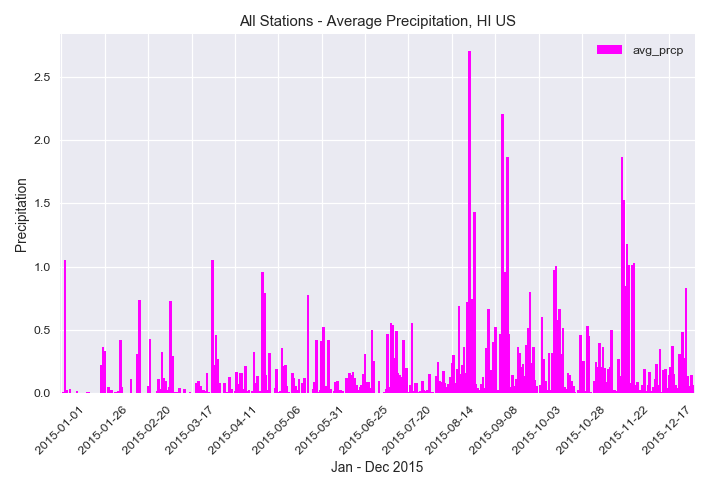

In [26]:
# Pandas DataFrame.plot(kind='bar')

ax = s_mean_df.plot(kind='bar',color='magenta', width=1.5, 
                    title="All Stations - Average Precipitation, HI US")
ax.set_xlabel("Jan - Dec 2015")
ax.set_ylabel("Precipitation")

n = 25

xticks = ax.xaxis.get_ticklocs()
xticklabels = [l.get_text().replace("00:00:00","") for l in ax.xaxis.get_ticklabels()]
ax.set_xticks(xticks[::n])
ax.set_xticklabels(xticklabels[::n], rotation=45)

plt.tight_layout()
plt.savefig("all_stations_avg_prcp_jan-dec-2015.png")
plt.show()